# BL40A2030 Wireless Communication Networks

## Final work

### Author: [Niki Malmsten]

**The goal of the final work is to compute the Transmission Capacity (i.e. the highest achievable Spatial Throughput considering a maximum acceptable outage probability constraint), also considering aspects related to queue stability. The final work will be step-by-step.**

Consider a bipolar network similar to the one presented in weeks 6 and 7, but now considering a slotted-ALOHA-style of medium access. 

- Network density $\lambda>0$
- Path-loss exponent $\alpha>2$
- Rayleigh fading, leading to a constant $\kappa$
- SIR threshold $\beta>0$
- TX-RX distance $d\geq1$
- Slotted Aloha access probability (independent for individual TXs): $p$
- Outage probability = 1 - success probability: $1 - e^{- \kappa p \lambda \pi d^2 \beta^{2/\alpha}} = 1 - P_s$
- Spatial throughput: $p \times \lambda \times  P_s \times \log_2(1+\beta)$
- Maximum acceptable outage probability: $\epsilon$

*Note: When the slotted-ALOHA-style MAC is used, the original Poisson point process is thinned and the process of active transmitters in the networks becomes $p\lambda$ active nodes per square-meter.*

(A)  Plot: $p \times \lambda \times  P_s \times \log_2(1+\beta)$ in terms of the access probability $p$, considering that $P_s = 1-\epsilon$. Assume: $\alpha=4$, $d=1$, $\epsilon = 0.05$ and $\lambda=0.02$.

*Hint: First proceed with the algebraic manipulation of $P_s = 1-\epsilon$ to find the value of $\beta$ as a function of the other variables. Then, you ended up in a new equation.*

(B) Find the value of $p$ that optimizes the spatial throughput.

*Hint: It might be possible that sympy cannot find the equation analytically so a numerical solution is also acceptable (see tutorial from week 7).*

(C) Test the result from (B) using the numerical values from (A) by making the plot including the optimal spatial throuhgput value. Verify also for $\lambda=0.01$ and $\lambda=0.025$.

(D) What is the transmission capacity of this network (i.e. the maximum achievable spatial throughput)? 

(E) Consider that the TXs have one queue where packets arrive at each time slot with a given probability $q$ (Bernoulli arrivals). What is the necessary relation between $p$ and $q$ that guarantees queue stability (i.e. the queue size is not growing to infinity with time). To answer this question you need to simulate this queue considering 3 conditions (i) $q<p$ by setting $q = p - 0.1$, (ii) $q=p$ and (iii) $q>p$ by setting $q = p + 0.1$ for the value of $p$ found in (B) for 10000 time-slots (time-steps) and evaluate the worst case delay.

*Hint: The packets will arrive with probability $q$ each time slot, while packets will leave with probability $p$ (similar to thowning a coin experiment with biased probability). This queue is similar to the "naive" simple queue approach taken in week 1 but now with Bernoulli arrivals and departures. To generate a sequence of Bernoulli, you can use the Binomial random number generator (numpy.random.binomial).*

(F) Write a short comment about what would you expect to happen with the queue of the TXs if:

- Restransmissions are allowed
- CSMA protocol is used
- Queues have a limited size


In [22]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import math
from scipy.spatial import distance
import warnings
import sympy as sp
warnings.filterwarnings('ignore')

In [191]:
## The symbols
p2, lamb2, B2, a2, d2, e2, k2 = sp.symbols('p lambda beta alpha d epsilon kappa', real=True, positive=True)
a = 4
d = 1
e = 0.05
lamb = 0.02
Ps = 1-e
B = 0
k = math.gamma(1 + 2/a) * math.gamma(1- 2/a)

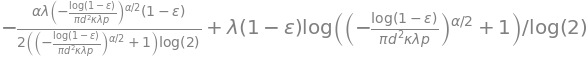

In [256]:
# test shit

#funktio = p2 * lamb2 * (1 - e2) * sp.log(1 - B2,2)
f = 1*a2*lamb2*((-sp.log(1-e2)/(sp.pi*d2**2*k2*lamb2*p2))**(a2/2))*(1-e2)

f2 = ((-sp.log(1-e2)/(sp.pi*d2**2*k2*lamb2*p2))**(a2/2)+1)*sp.log(2)*2

f5 = (-sp.log(1-e2)/(sp.pi*d2**2*k2*lamb2*p2))**(a2/2)+1

f3 = lamb2*(1-e2)*sp.log(f5)/sp.log(2)

f4 = -f/f2+f3
f4
f6 = sp.integrate(f4, p2)
f6

In [130]:
## The function
sp.init_printing() 

funktio = p2 * lamb2 * sp.exp(-k2*p2*lamb2*sp.pi*d2**2*B2**(2/a2))*sp.log(1+B2)/sp.log(2)
funktio



In [150]:
## Derivation

funktio2 = sp.diff(funktio, p2)
#funktio2 = sp.simplify(funktio2)
funktio2


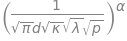

In [151]:
## Numerical solution
#funktio2 = funktio2.subs(a2, a).subs(d2, d).subs(k2, k).subs(e2, e).subs(lamb2, lamb)
funktio3 = sp.solve(funktio2, B2)
funktio3[0]


In [185]:
fun = p2 * lamb2 * (1-e2) * sp.log(1-B2, 2)
fun = fun.subs(B2, funktio3[0])
fun = sp.diff(fun, p2)

#fun = funktio.subs(B2, funktio3[0])
#fun = sp.diff(fun, p2)
#fun = sp.simplify(fun)
#sp.solveset(fun,p2)
fun = fun.subs(a2, a).subs(d2, d).subs(k2, k).subs(e2, e).subs(lamb2, lamb)
fun = sp.nsolve(fun, p2, )
fun

In [ ]:
#e = 0.05
#λ = 0.02
#d = 1
#a = 4
#k = math.gamma(1 + 2/a) * math.gamma(1- 2/a)
p, l, B, λ, a, d, e, k = sp.symbols('p l B λ a d e k')
b = sp.exp(-k*p*λ*sp.pi*d**2*B**(2/a))
a = sp.solve(p*λ*b*sp.log(1+B,2),B)
a
#c = sp.diff(a, B)



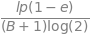

In [ ]:
sp.init_printing() 
p, l, e, B = sp.symbols('p l e B')
a = p*l*(1-e)*sp.log(1+B,2)
a
b = sp.diff(a,B)
b

In [ ]:
%reset

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc035cc0-996d-4fa3-af0c-6c39ba437636' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>